In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
df = pd.read_excel("/content/drive/MyDrive/placement_projects/ram_abhinav_project/project-1Data.xlsx")
df.tail()


,DEGREE_INJURY_CD,DEGREE_INJURY,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,...,INJ_BODY_PART_CD,INJ_BODY_PART,DAYS_RESTRICT,NO_INJURIES,TOT_EXPER,MINE_EXPER,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR
31670,6,"NO DYS AWY FRM WRK,NO RSTR ACT",9,HANDLING OF MATERIALS,21,"Caught in, under or between a moving and a sta...",304,"Maintenance man, Mechanic, Repair/Serviceman,...",039,Machine maintenance,...,340,FINGER(S)/THUMB,0.0,1,0.73,0.73,2021,4,2022,1
31671,6,"NO DYS AWY FRM WRK,NO RSTR ACT",19,STEPPING OR KNEELING ON OBJECT,1,Struck against stationary object,046,"Roof bolter, Rock bolter, Pinner, Mobile roof...",080,"Roof bolter, NEC",...,513,LOWER LEG/TIBIA/FIBULA,0.0,1,14.00,0.83,2021,2,2021,3
31672,6,"NO DYS AWY FRM WRK,NO RSTR ACT",11,NONPOWERED HAULAGE,28,Over-exertion in pulling or pushing objects,316,"Laborer, Blacksmith, Bull gang, Parts runner, ...",041,Move non-self-propelled equip,...,420,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,1,0.23,0.23,2021,1,2021,2
31673,3,DAYS AWAY FROM WORK ONLY,12,POWERED HAULAGE,20,"Caught in, under or between running or meshing...",116,"Laborer, Bull gang, Parts runner, Roustabout,...",050,Conveyor belt,...,310,"ARM,NEC",0.0,1,6.00,0.08,2021,3,2021,4
31674,0,ACCIDENT ONLY,2,ENTRAPMENT,44,"Accident type, without injuries",?,NO VALUE FOUND,?,NO VALUE FOUND,...,?,NO VALUE FOUND,NaN,0,NaN,NaN,2021,4,2022,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31675 entries, 0 to 31674
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DEGREE_INJURY_CD   31675 non-null  int64  
 1   DEGREE_INJURY      31675 non-null  object 
 2   CLASSIFICATION_CD  31675 non-null  int64  
 3   CLASSIFICATION     31675 non-null  object 
 4   ACCIDENT_TYPE_CD   31675 non-null  int64  
 5   ACCIDENT_TYPE      31675 non-null  object 
 6   OCCUPATION_CD      31675 non-null  object 
 7   OCCUPATION         31675 non-null  object 
 8   ACTIVITY_CD        31675 non-null  object 
 9   ACTIVITY           31675 non-null  object 
 10  INJURY_SOURCE_CD   31675 non-null  object 
 11  INJURY_SOURCE      31675 non-null  object 
 12  NATURE_INJURY_CD   31675 non-null  object 
 13  NATURE_INJURY      31675 non-null  object 
 14  INJ_BODY_PART_CD   31675 non-null  object 
 15  INJ_BODY_PART      31675 non-null  object 
 16  DAYS_RESTRICT      283

In [5]:
df=df.dropna()

In [6]:
# severity=[]
# for i in range(len(df)):
#   if df['DEGREE_INJURY_CD'][i] in [0,3,6,8,9,10]:
#     severity.append('Slight')
#   elif df['DEGREE_INJURY_CD'][i] in [2,4,5,7]:
#     severity.append('Severe')
#   else:
#     severity.append('Fatal')
severity = []
for i in range(len(df)):
    value = df.iloc[i, 0]  # Access the element at row i and column 0
    if value in [0, 3, 6, 8, 9, 10]:
        severity.append('Slight')
    elif value in [2, 4, 5, 7]:
        severity.append('Severe')
    else:
        severity.append('Fatal')


In [7]:
df['Severity']=severity

In [8]:
df

,DEGREE_INJURY_CD,DEGREE_INJURY,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,...,INJ_BODY_PART,DAYS_RESTRICT,NO_INJURIES,TOT_EXPER,MINE_EXPER,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,Severity
0,3,DAYS AWAY FROM WORK ONLY,14,IGNITION OR EXPLOSION OF GAS OR DUST,33,Contact with hot objects or substances,306,Welder (non-shop),093,Welding or cutting,...,HIPS (PELVIS/ORGANS/KIDNEYS/BUTTOCKS),0.0,1,13.21,13.21,2017,2,2017,3,Slight
1,6,"NO DYS AWY FRM WRK,NO RSTR ACT",3,EXPLODING VESSELS UNDER PRESSURE,5,Struck by flying object,418,"Belt foreman, Maintenance foreman, Maintenance...",039,Machine maintenance,...,HAND (NOT WRIST OR FINGERS),0.0,1,5.00,5.00,2017,2,2017,3,Slight
2,6,"NO DYS AWY FRM WRK,NO RSTR ACT",9,HANDLING OF MATERIALS,21,"Caught in, under or between a moving and a sta...",016,"Laborer, Bull gang, Faceman, Parts runner, Rou...",039,Machine maintenance,...,FINGER(S)/THUMB,0.0,1,0.04,0.04,2017,2,2017,3,Slight
3,4,DYS AWY FRM WRK & RESTRCTD ACT,9,HANDLING OF MATERIALS,30,Over-exertion NEC,116,"Laborer, Bull gang, Parts runner, Roustabout,...",023,Getting on or off equipment,...,TOE(S)/PHALANGES,148.0,1,2.46,2.46,2017,3,2017,4,Severe
4,3,DAYS AWAY FROM WORK ONLY,12,POWERED HAULAGE,24,"Caught in, under or between NEC",104,"Maintenance man, Mechanic, Repair/Serviceman,...",020,Electrical maintenance,...,ANKLE,0.0,1,6.08,6.08,2017,2,2017,3,Slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31669,5,DAYS RESTRICTED ACTIVITY ONLY,18,SLIP OR FALL OF PERSON,17,Fall to the walkway or working surface,316,"Laborer, Blacksmith, Bull gang, Parts runner, ...",092,"Walking, Running",...,WRIST,50.0,1,0.15,0.15,2021,4,2022,1,Severe
31670,6,"NO DYS AWY FRM WRK,NO RSTR ACT",9,HANDLING OF MATERIALS,21,"Caught in, under or between a moving and a sta...",304,"Maintenance man, Mechanic, Repair/Serviceman,...",039,Machine maintenance,...,FINGER(S)/THUMB,0.0,1,0.73,0.73,2021,4,2022,1,Slight
31671,6,"NO DYS AWY FRM WRK,NO RSTR ACT",19,STEPPING OR KNEELING ON OBJECT,1,Struck against stationary object,046,"Roof bolter, Rock bolter, Pinner, Mobile roof...",080,"Roof bolter, NEC",...,LOWER LEG/TIBIA/FIBULA,0.0,1,14.00,0.83,2021,2,2021,3,Slight
31672,6,"NO DYS AWY FRM WRK,NO RSTR ACT",11,NONPOWERED HAULAGE,28,Over-exertion in pulling or pushing objects,316,"Laborer, Blacksmith, Bull gang, Parts runner, ...",041,Move non-self-propelled equip,...,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,1,0.23,0.23,2021,1,2021,2,Slight


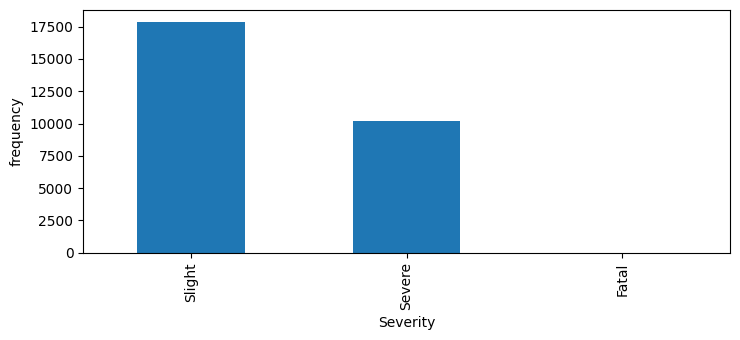

In [9]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

#df = pd.DataFrame({'numbers': [2, 4, 1, 4, 3, 2, 1, 3, 2, 4]})
df['Severity'].value_counts().plot(ax=ax, kind='bar', xlabel='Severity', ylabel='frequency')
df['Severity'].value_counts()
plt.show()

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/placement_projects/ram_abhinav_project/Book1.xlsx')

In [14]:
# data=data[51327:]
data=data[:28099]

In [15]:
data=data.reset_index()

In [16]:
data.head()

,index,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,...,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND
0,0,5001267,M00089,Hecla Mining Company,L11319,Hecla Greens Creek Mining Company,GA1,220120580056,1,UNDERGROUND,...,0.0,112.0,N,08/14/2012,?,NO VALUE FOUND,NaN,Employee was unhooking the check valve off of ...,3.201224e+11,M
1,1,4407123,0041211,"Alpha Natural Resources, Inc.",0050885,Paramont Coal Company Virginia LLC,NaN,220120680019,1,UNDERGROUND,...,0.0,0.0,NaN,NaN,08,ROOF FALL,03/02/2012,A roof fall was discovered in the #4 entry in ...,NaN,C
2,2,2302120,0041044,Lhoist Group,L14044,"Lhoist North America of Missouri, Inc",NaN,220122510008,30,MILL OPERATION/PREPARATION PLANT,...,0.0,0.0,N,08/28/2012,?,NO VALUE FOUND,08/29/2012,While removing belt scraper on belt conveyor B...,NaN,M
3,3,4406816,C15561,Arch Resources Inc,P21182,Cumberland River Coal LLC,NaN,220122220047,1,UNDERGROUND,...,0.0,0.0,NaN,NaN,08,ROOF FALL,07/31/2012,Roof fall was found when EE and MSHA was makin...,NaN,C
4,4,4202359,0041609,Jessica E Schmidt,0051199,"Schmidt Construction, Inc.",NaN,220121670013,3,"STRIP, QUARY, OPEN PIT",...,0.0,8.0,N,06/25/2012,?,NO VALUE FOUND,NaN,"Two workers on the ground pushing over a 17"" f...",3.201218e+11,M


In [17]:
df.head()

,DEGREE_INJURY_CD,DEGREE_INJURY,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,...,INJ_BODY_PART,DAYS_RESTRICT,NO_INJURIES,TOT_EXPER,MINE_EXPER,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,Severity
0,3,DAYS AWAY FROM WORK ONLY,14,IGNITION OR EXPLOSION OF GAS OR DUST,33,Contact with hot objects or substances,306,Welder (non-shop),093,Welding or cutting,...,HIPS (PELVIS/ORGANS/KIDNEYS/BUTTOCKS),0.0,1,13.21,13.21,2017,2,2017,3,Slight
1,6,"NO DYS AWY FRM WRK,NO RSTR ACT",3,EXPLODING VESSELS UNDER PRESSURE,5,Struck by flying object,418,"Belt foreman, Maintenance foreman, Maintenance...",039,Machine maintenance,...,HAND (NOT WRIST OR FINGERS),0.0,1,5.00,5.00,2017,2,2017,3,Slight
2,6,"NO DYS AWY FRM WRK,NO RSTR ACT",9,HANDLING OF MATERIALS,21,"Caught in, under or between a moving and a sta...",016,"Laborer, Bull gang, Faceman, Parts runner, Rou...",039,Machine maintenance,...,FINGER(S)/THUMB,0.0,1,0.04,0.04,2017,2,2017,3,Slight
3,4,DYS AWY FRM WRK & RESTRCTD ACT,9,HANDLING OF MATERIALS,30,Over-exertion NEC,116,"Laborer, Bull gang, Parts runner, Roustabout,...",023,Getting on or off equipment,...,TOE(S)/PHALANGES,148.0,1,2.46,2.46,2017,3,2017,4,Severe
4,3,DAYS AWAY FROM WORK ONLY,12,POWERED HAULAGE,24,"Caught in, under or between NEC",104,"Maintenance man, Mechanic, Repair/Serviceman,...",020,Electrical maintenance,...,ANKLE,0.0,1,6.08,6.08,2017,2,2017,3,Slight


In [18]:
data['Severity']=severity

In [19]:
df['Classification']=data['CLASSIFICATION']

In [20]:
death_class=list(df['Classification'].unique())

In [25]:
death_class

['SLIP OR FALL OF PERSON',
 'FALL OF ROOF OR BACK',
 'HANDLING OF MATERIALS',
 'FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL',
 'POWERED HAULAGE',
 'OTHER',
 'HANDTOOLS (NONPOWERED)',
 'STRIKING OR BUMPING',
 'MACHINERY',
 'DISORDERS (REPEATED TRAUMA)',
 'FIRE',
 'STEPPING OR KNEELING ON OBJECT',
 'ENTRAPMENT',
 'HOISTING',
 'FALLING/SLIDING/ROLLING MATERIALS',
 'INUNDATION',
 'ALL OTHER OCCUPATIONAL ILLNESSES',
 'RESPIRATORY CONDITIONS (TOXIC AGENTS)',
 'IGNITION OR EXPLOSION OF GAS OR DUST',
 'ELECTRICAL',
 'DISORDERS (PHYSICAL AGENTS)',
 'NONPOWERED HAULAGE',
 'DUST DISEASE OF LUNGS',
 'OCCUPATIONAL SKIN DISEASES',
 'EXPLODING VESSELS UNDER PRESSURE',
 'IMPOUNDMENT',
 'EXPLOSIVES AND BREAKING AGENTS',
 'POISONING (TOXIC MATERIALS)',
 nan]

SLIP OR FALL OF PERSON


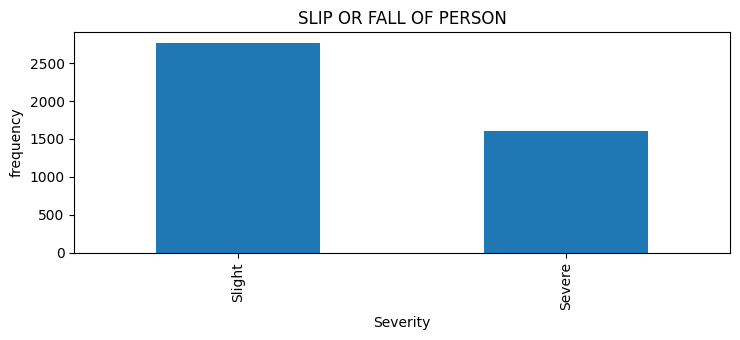

FALL OF ROOF OR BACK


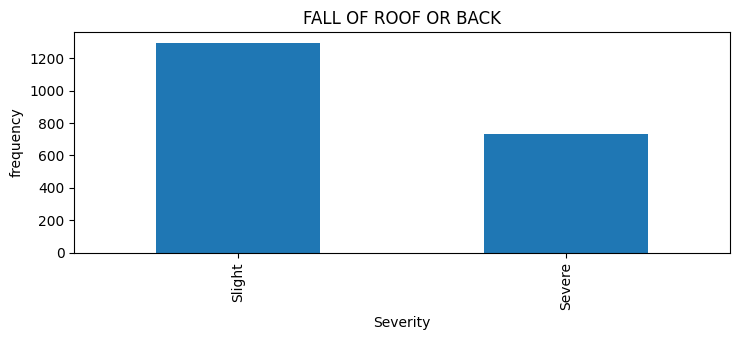

HANDLING OF MATERIALS


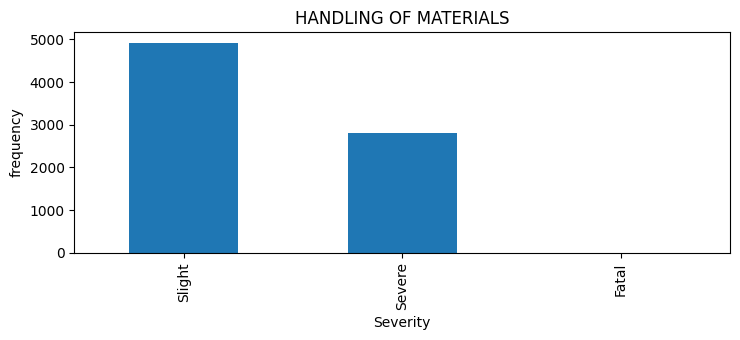

FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL


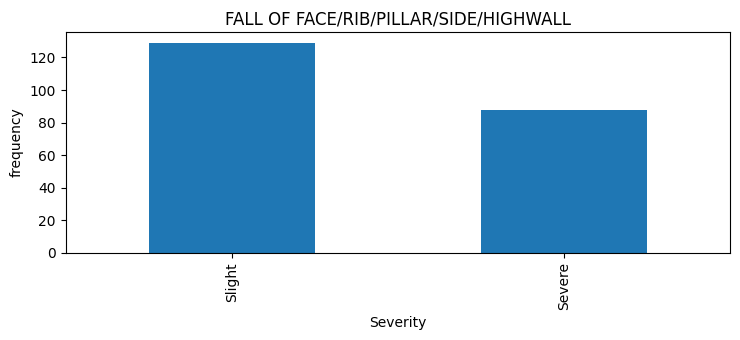

POWERED HAULAGE


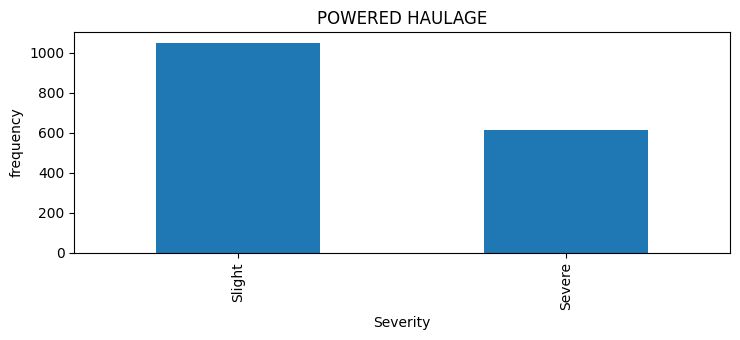

OTHER


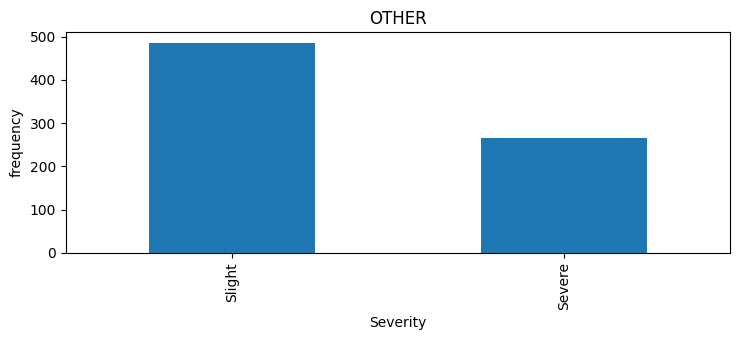

HANDTOOLS (NONPOWERED)


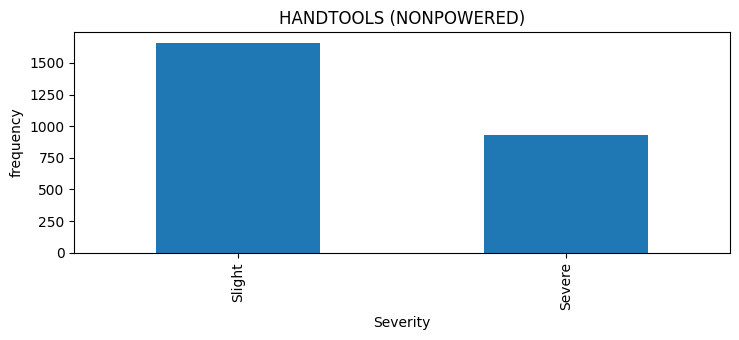

STRIKING OR BUMPING


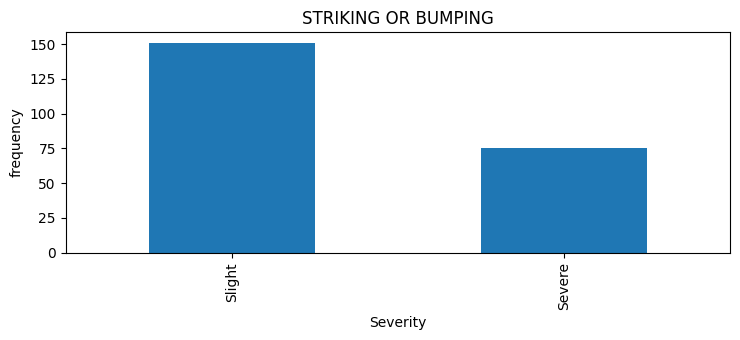

MACHINERY


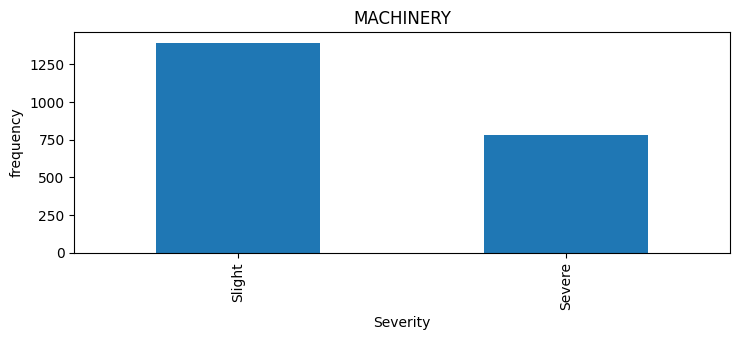

DISORDERS (REPEATED TRAUMA)


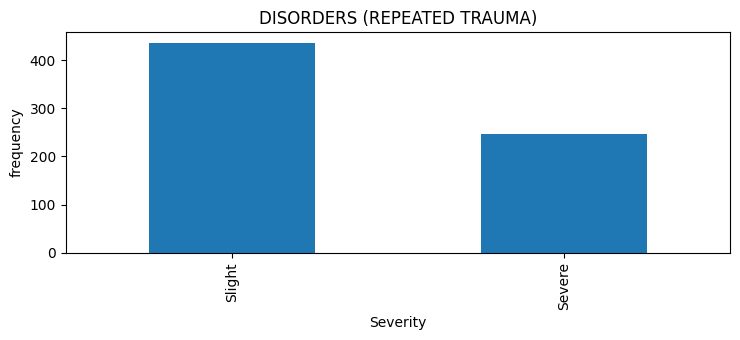

FIRE


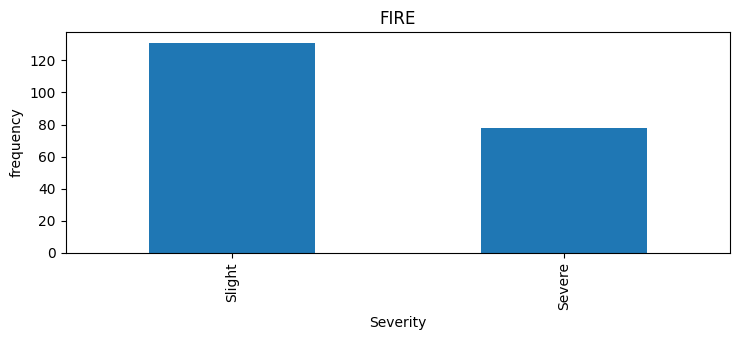

STEPPING OR KNEELING ON OBJECT


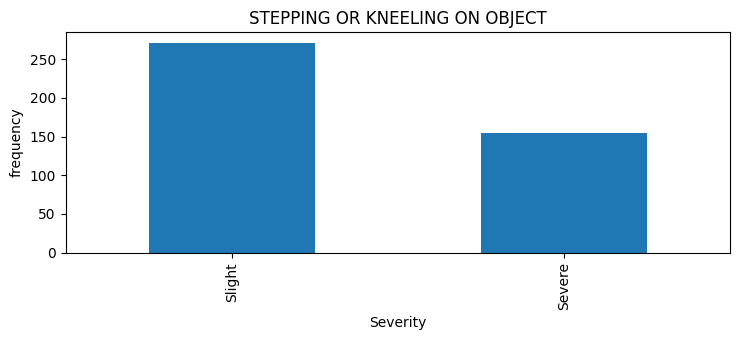

ENTRAPMENT


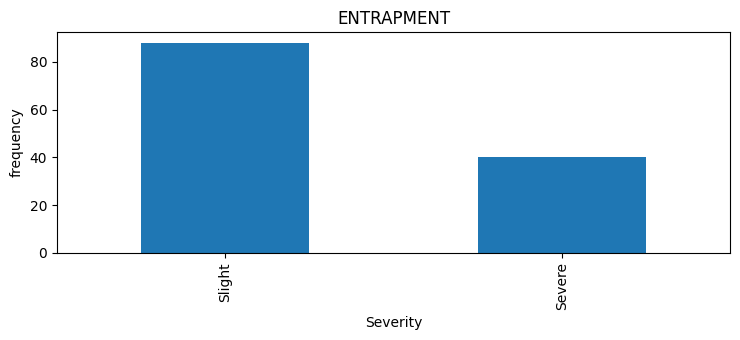

HOISTING


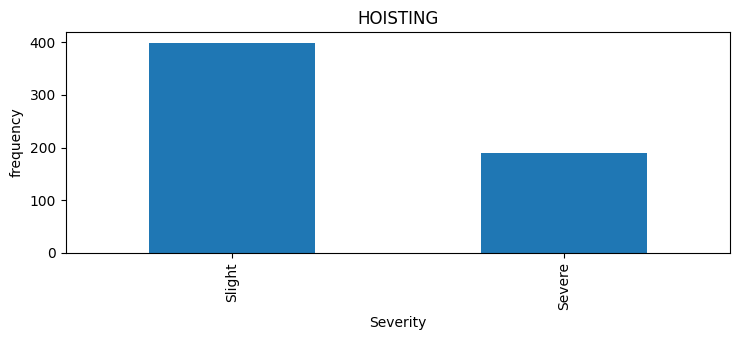

FALLING/SLIDING/ROLLING MATERIALS


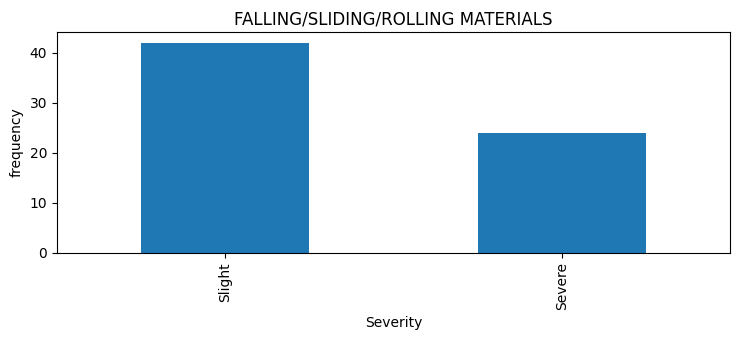

INUNDATION


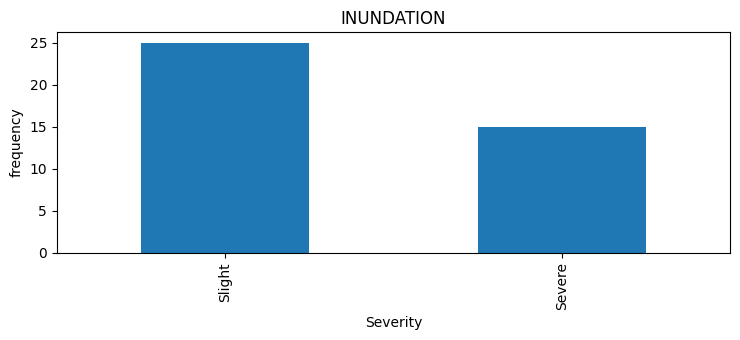

ALL OTHER OCCUPATIONAL ILLNESSES


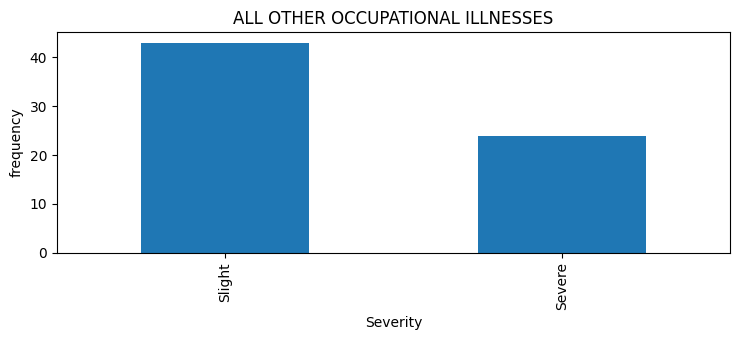

RESPIRATORY CONDITIONS (TOXIC AGENTS)


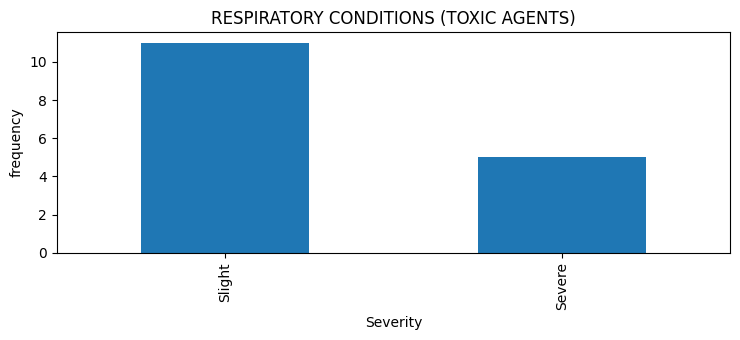

IGNITION OR EXPLOSION OF GAS OR DUST


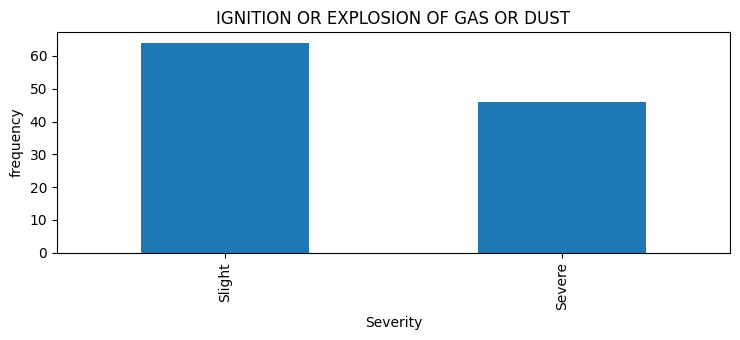

ELECTRICAL


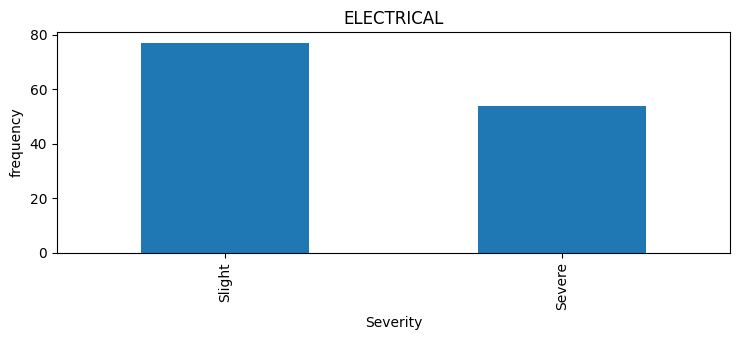

DISORDERS (PHYSICAL AGENTS)


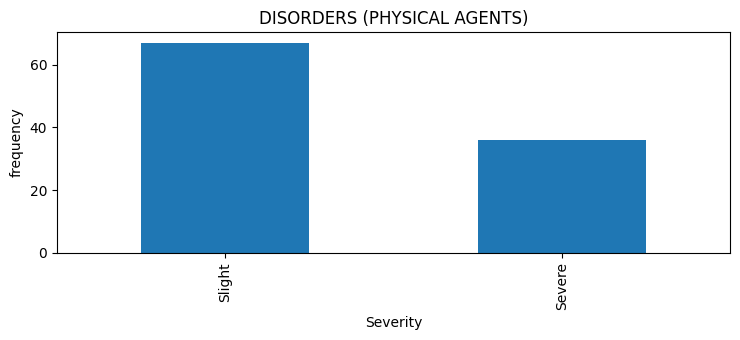

NONPOWERED HAULAGE


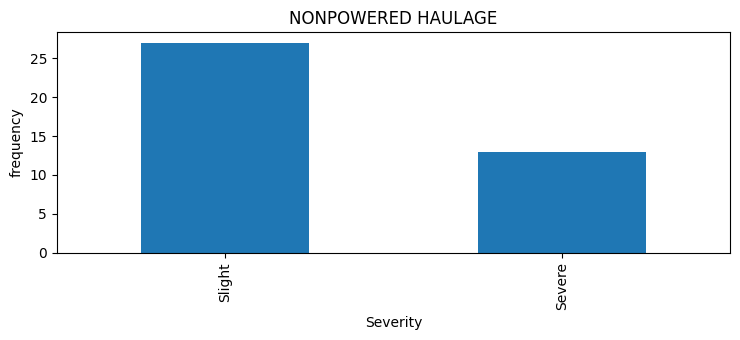

DUST DISEASE OF LUNGS


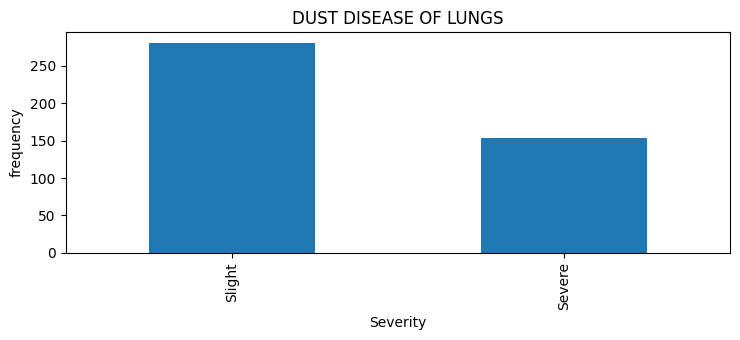

OCCUPATIONAL SKIN DISEASES


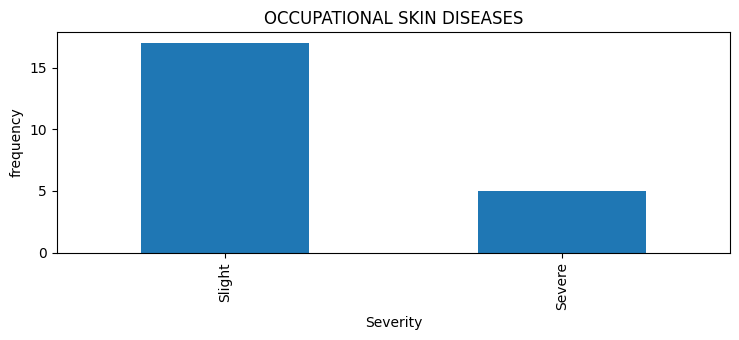

EXPLODING VESSELS UNDER PRESSURE


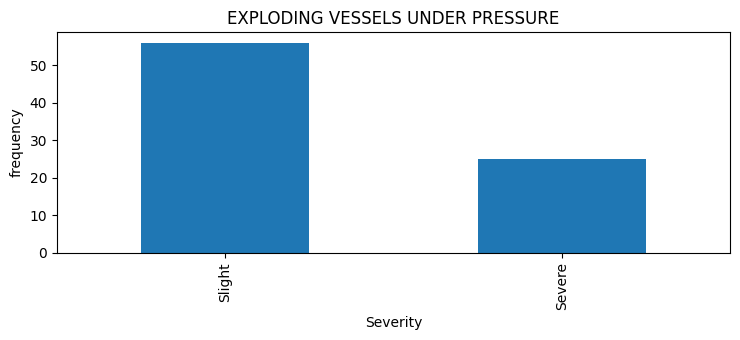

IMPOUNDMENT


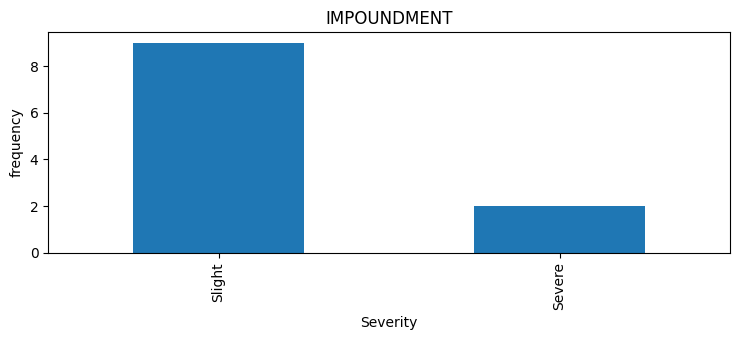

EXPLOSIVES AND BREAKING AGENTS


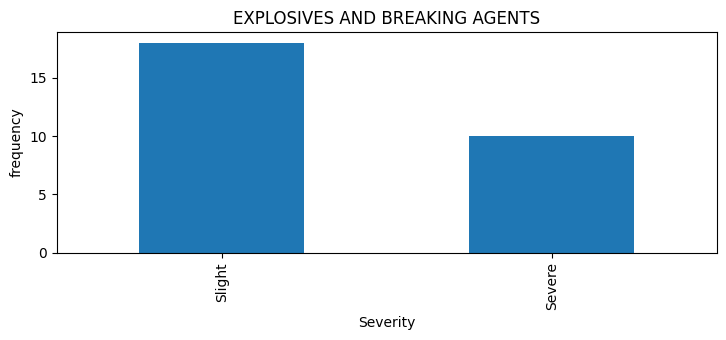

POISONING (TOXIC MATERIALS)


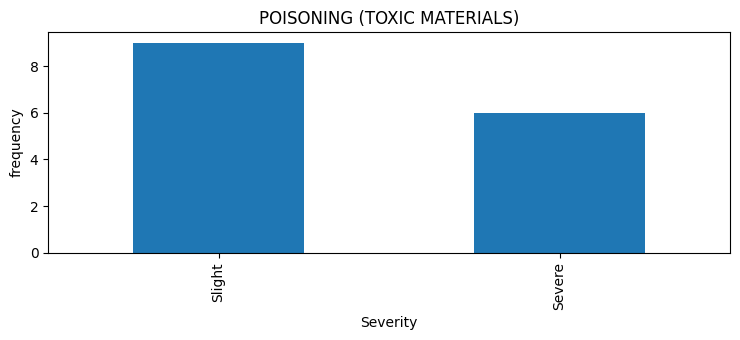

KeyError: ignored

In [24]:
# for i in death_class:
#   ddf = df.groupby('Classification')
#   dddf = ddf.get_group(i)
#   print(i)
#   plt.rcParams["figure.figsize"] = [7.50, 3.50]
#   plt.rcParams["figure.autolayout"] = True


#   fig, ax = plt.subplots()
#   dddf['Severity'].value_counts().plot(ax=ax, kind='bar', xlabel='Severity', ylabel='frequency')
#   plt.title(i)
#   plt.show()
import matplotlib.pyplot as plt

for i in death_class:
    ddf = df.groupby('Classification')
    dddf = ddf.get_group(i)
    print(i)

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True

    fig, ax = plt.subplots()
    dddf['Severity'].value_counts().plot(ax=ax, kind='bar', xlabel='Severity', ylabel='frequency')
    plt.title(i)
    plt.show()

# Reset matplotlib settings to default after plotting
plt.rcParams["figure.figsize"] = [6.0, 4.0]
plt.rcParams["figure.autolayout"] = False


<ipython-input-27-7a5648ae0ffd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


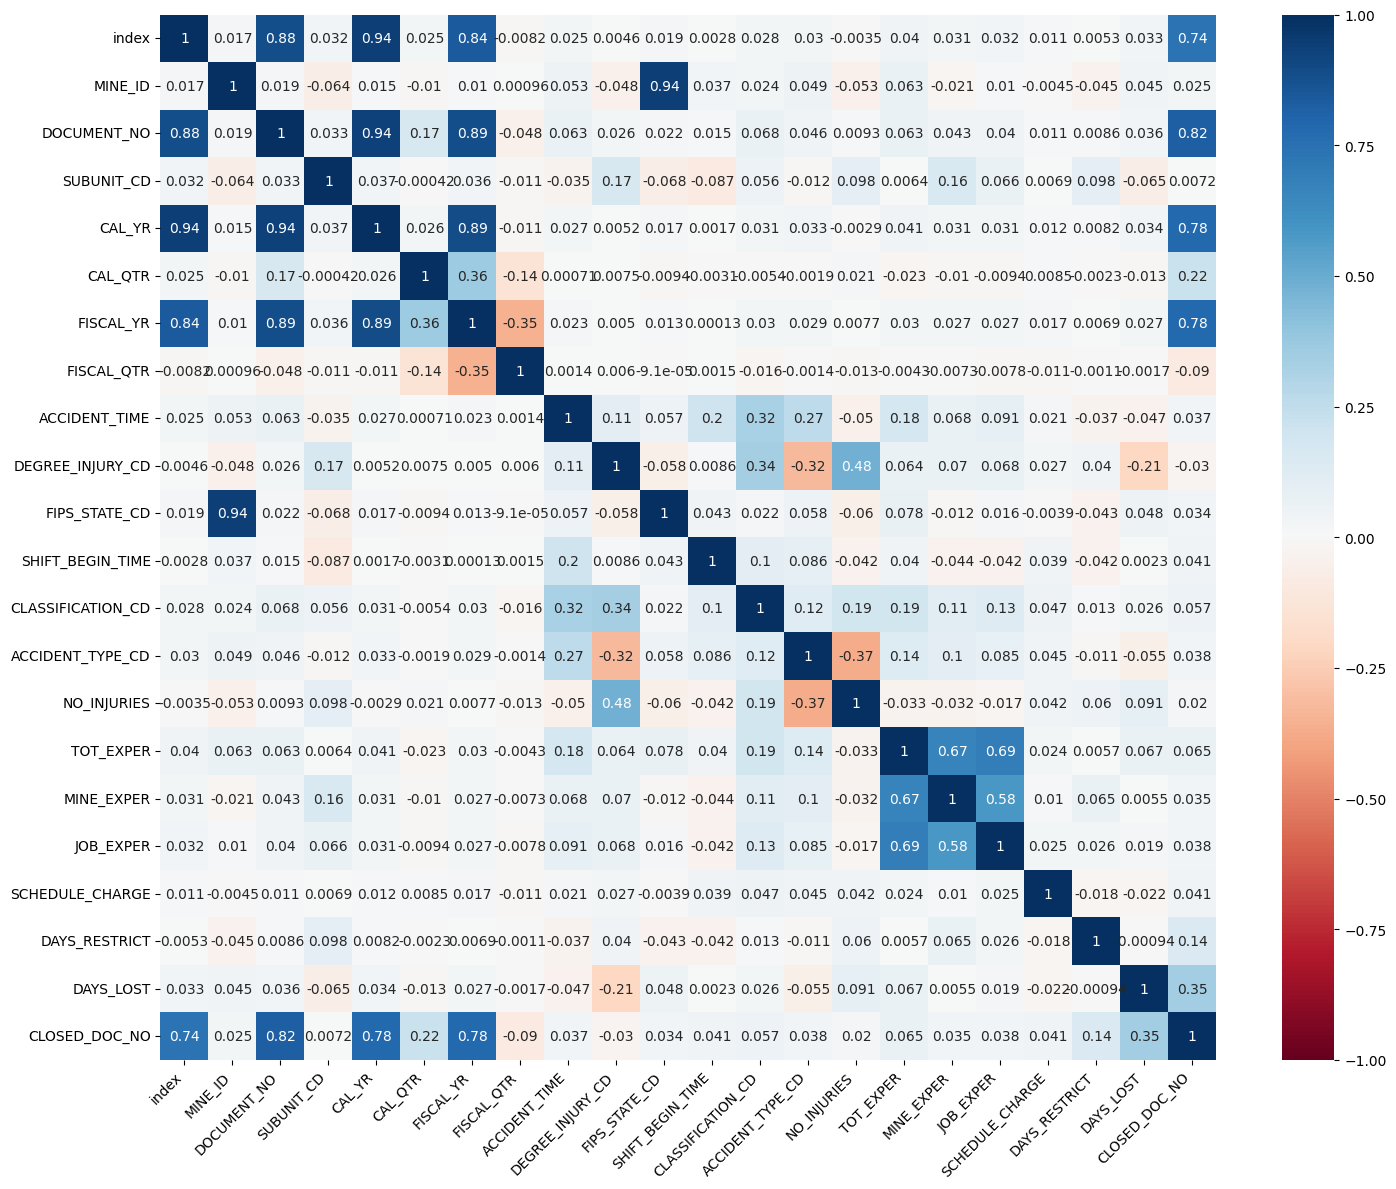

In [27]:
import seaborn as sns
corr = data.corr()
ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(
   corr,
  vmin=-1, vmax=1, center=0,
    #cmap=sns.diverging_palette(20, 220, n=200),
    cmap = 'RdBu',
    annot=True
    #square=True
)

ax.set_xticklabels(
   ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#sns.heatmap(corr)
#sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)


In [28]:
 upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
 print(upper_tri)

                   index   MINE_ID  DOCUMENT_NO  SUBUNIT_CD    CAL_YR  \
index                NaN  0.017417     0.882952    0.031833  0.941687   
MINE_ID              NaN       NaN     0.019064   -0.063829  0.015170   
DOCUMENT_NO          NaN       NaN          NaN    0.033281  0.937068   
SUBUNIT_CD           NaN       NaN          NaN         NaN  0.036840   
CAL_YR               NaN       NaN          NaN         NaN       NaN   
CAL_QTR              NaN       NaN          NaN         NaN       NaN   
FISCAL_YR            NaN       NaN          NaN         NaN       NaN   
FISCAL_QTR           NaN       NaN          NaN         NaN       NaN   
ACCIDENT_TIME        NaN       NaN          NaN         NaN       NaN   
DEGREE_INJURY_CD     NaN       NaN          NaN         NaN       NaN   
FIPS_STATE_CD        NaN       NaN          NaN         NaN       NaN   
SHIFT_BEGIN_TIME     NaN       NaN          NaN         NaN       NaN   
CLASSIFICATION_CD    NaN       NaN          NaN    

<ipython-input-28-05ebe19effb4>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


In [29]:
import pandas as pd
datanew = ['CLASSIFICATION_CD', 'ACCIDENT_TYPE_CD', 'NO_INJURIES','DAYS_LOST','DEGREE_INJURY_CD']
df1 = pd.DataFrame().assign(CLASSIFICATION_CD=data['CLASSIFICATION_CD'], ACCIDENT_TYPE_CD=data['ACCIDENT_TYPE_CD'], NO_INJURIES=data['NO_INJURIES'],DAYS_LOST=data['DAYS_LOST'],DEGREE_INJURY_CD=data['DEGREE_INJURY_CD'])

df2 = df1.dropna()
df2.head()

,CLASSIFICATION_CD,ACCIDENT_TYPE_CD,NO_INJURIES,DAYS_LOST,DEGREE_INJURY_CD
0,18,14,1,112.0,3
1,7,44,0,0.0,0
2,9,4,1,0.0,6
3,7,44,0,0.0,0
4,9,21,1,8.0,3


In [30]:
x = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values
print(x)


[[ 18.  14.   1. 112.]
 [  7.  44.   0.   0.]
 [  9.   4.   1.   0.]
 ...
 [  9.   4.   1.   0.]
 [  9.  27.   1.   0.]
 [ 10.   8.   1.   0.]]


Applying Decision Tree (Target = Degree_Injury_ID)


In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth = 3, random_state=0);
clf.fit(x_train, y_train);

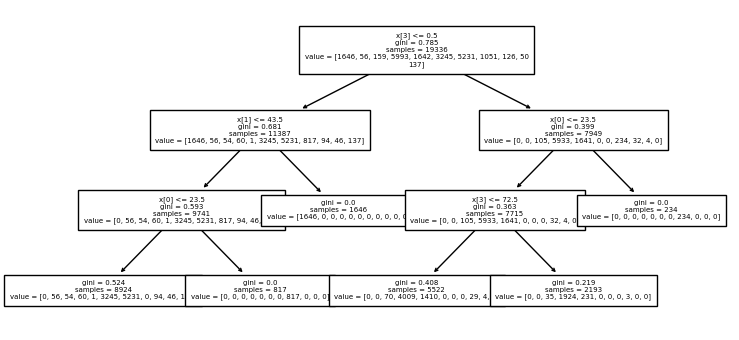

In [34]:
plot_tree(clf,fontsize = 5)
plt.savefig('tree', dpi=200)

In [35]:
y_pred = clf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7152166043200193

Logistic Regression

In [37]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.711 (0.006)


K-Nearest Neighbour

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [39]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [40]:
y_pred = knn.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7386267648123567

Support Vector Machine

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7362133462048992
